<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
from datascience import *
from prob140 import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Lab 8: Densities and `SymPy` #
When you work with densities there is often some calculus involved. Sometimes, recognizing integrals as probabilistic quantities (probabilities, expectations, and so on) can help reduce the calculus. 

But sometimes you just have to crank out the calculus. This can occasionally be messy. It would be nice to have some help. Fortunately, Python can help.

The `SymPy` library is a set of tools that help you do symbolic math on the computer. To see what this means, let's start with a simple numerical calculation of a familiar sort.

In [2]:
x = 3
(2 * x + 1) ** 2

49

What you can do in `SymPy`, assuming that you have explained to `SymPy` that $x$ is a symbol, is to have `(2*x + 1) ** 2` appear as $(2x + 1)^2$. You can then expand it to get $4x^2 + 4x + 1$. `SymPy` does the math that you did long ago in algebra class, and renders the math in symbols. It gives you an exact symbolic answer, instead of numerical answer (that is often an approximation) in a particular case.

`SymPy` contains a large number of mathematical functions and operations, including integration and differentiation. This can be very handy when working with densities.

What you will learn in this lab:

- How to use `SymPy`
- How `SymPy` can help you understand properties of random variables that have densities
- How to implement the theory of densities (Parts 1-3) including change of variable
- How to implement the theory of joint densities (Part 4) including conditioning on continuous variables

This lab is intended not only to guide you through symbolic math on `SymPy` but also to develop your skills for working with densities. Pay close attention to each of the questions in Parts 2-5 as they will help you grasp the theory of continuous random variables.

### Getting Started ###
We must import the library and add a line of code that makes the math appear in the way that it appears in the Prob 140 [textbook](http://prob140.org/textbook/README).

In [3]:
from sympy import *
init_printing()

Before you begin, it is **strongly recommended** that you skim [Section 15.5](http://prob140.org/textbook/Chapter_15/05_Calculus_in_SymPy.html) (Calculus in SymPy) of the textbook. It will give you a good sense of what you will do in the lab, and might help you answer some of the questions.

## Instructions
Your labs have two components: a written portion and a portion that also involves code. Written work should be completed on paper, and coding questions should be done in the notebook. You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the lab are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

#newpage 

## Part 1: The Operations ##
We will start with simple examples of the basic operations and syntax. For more, take a look at the [SymPy Tutorial](https://docs.sympy.org/latest/tutorial/index.html).

### 1a) Creating a Symbolic Variable ###

You are used to assigning names to numbers, arrays, and so on. In `SymPy`, we create a symbol using `Symbol`. Its required argument is a string that contains the symbol we want to use. We can assign that to a name, just as we have done before.

In [4]:
# Create a symbol

x = Symbol('x')
x

### 1b) Constructing a Symbolic Expression ###

Consider the math function $f(x) ~ = ~ 2x + 1$. We can create a `SymPy` expression equal to the right hand side, as follows.

In [5]:
# An expression that is the right hand side
# of the definition of f(x)

2*x + 1

In [6]:
# Name the expression and display it

f = 2*x + 1
f

It is important to make a distinction between the math function $f$ and the `SymPy` expression `f`. Though `f` doesn't have an $x$ in the name, it is equal to $f(x)$, the math function $f$ evaluated at the point $x$.

You can create new expressions by using math operations.

In [7]:
f ** 2

You can ask `SymPy` to expand the square, to get an equivalent expression.

In [8]:
expand(f ** 2)

### 1c) Evaluating an Expression at a Point ###

To evaluate $f(5)$ in math, we have take the expression $2x + 1$ and substitute the generic $x$ with the specific value $5$. So also in `SymPy`, we evaluate the symbolic expression `f` at the point 5 by using substitution.

In [9]:
# Evaluate the expression at the point x = 5

f.subs(x, 5)

Points themselves can be symbols. For example, `SymPy` recognizes `pi` as $\pi$. So we can evaluate the function $f$ at $\pi$:

In [10]:
f.subs(x, pi)

You can see that `SymPy` makes choices about exactly how to display expressions. All symbolic math systems make such decisions, but not always in the same way. 

It is important to notice the difference between symbolic and numeric calculations such as those you perform using `NumPy`. For example, recall that `np.pi` is the `NumPy` expression for $\pi$, and run the cell below. 

In [11]:
f.subs(x, pi), f.subs(x, np.pi)

An important aspect of the distinction is that the first expression is exact while the numerical calculation results in an approximate value.

### 1d) Integration ###
Integration is one of the most important operations in probability. If a random variable $X$ has a density $f_X$, then $P(a < X < b) = \int_a^bf_X(x)dx$, $E(X) = \int_{-\infty}^\infty xf_X(x)dx$ (assuming the integral exists), and so on.

Let's learn how to integrate functions using `SymPy`.

The indefinite integral $\int f(x)dx$ can be displayed using `Integral(f)`.

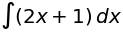

In [12]:
# Display the indefinite integral

Integral(f)

That's nice, but it would be even nicer if `SymPy` could actually do the integral, not just show it to us.

To make this happen, we are going to be a bit rude. We are going to tell `SymPy` to just `doit()`.

In [13]:
# Evaluate the indefinite integral

Integral(f).doit()

This creates a new `SymPy` expression, which you can assign to a name as usual.

In [14]:
F = Integral(f).doit()
F

Definite integrals can be calculated in two ways, corresponding to the left and right hand sides of the example below.

$$
\int_3^7 f(x)dx ~ = ~ F(7) - F(3)
$$

You already know how to compute the right hand side using substitution and the expression representing the indefinite integral.

In [15]:
# right hand side

F.subs(x, 7) - F.subs(x, 3)

To display a definite integral, `Integral` requires an additional argument that specifies the variable being integrated and the two limits of integration: 

- (variable_name, lower_limit, upper_limit)

At the moment we are working with a function of just one variable, so it seems unnecessary to provide the name of the variable. But the name will become important as soon as we start double integration.

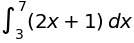

In [16]:
# left hand side
# Display the definite integral

Integral(f, (x, 3, 7))

To evaluate the integral, use `doit()` as before. You will get the same answer as you did earlier.

In [17]:
# Evaluate the definite integral

Integral(f, (x, 3, 7)).doit()

The standard operations on integrals can be performed just as you would expect. At each cell below, pause and read the expression carefully. Then run the cell and examine the output just as carefully.

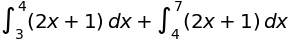

In [18]:
# Display a sum of integrals

Integral(f, (x, 3, 4)) + Integral(f, (x, 4, 7))

In [19]:
# Evaluate it

( Integral(f, (x, 3, 4)) + Integral(f, (x, 4, 7)) ).doit()

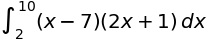

In [20]:
# Display the integral of a new function of x

Integral((x-7)*f, (x, 2, 10))

In [21]:
# Evaluate the integral

Integral((x-7)*f, (x, 2, 10)).doit()

You could have evaluated each of these integrals without displaying it first. But it is strongly recommended that you do display the integral first, so that you are confident that the right quantity is being calculated.

### 1e) Differentiation ###
We started with $f(x) = 2x+1$:

In [22]:
f

So
$$
\frac{d}{dx} f(x) ~ = ~ 2
$$

To get the derivative in `SymPy`, use `diff`.

In [23]:
diff(f)

Since we defined $F$ as the integral of $f$, the Fundamental Theorem of Calculus says that

$$
f(x) ~ = ~ \frac{d}{dx} F(x)
$$

In [24]:
# Differentiate F to get back f

diff(F)

In [25]:
# You can differentiate F twice, just for fun
# That's the same as differentiating f

diff(diff(F))

### 1f) Solving an Equation ###
Equations can have numerous different forms, so symbolic math systems require consistent ways of specifying the equations to be solved. That way they don't have to have separate functions for solving all the different kinds of equations. Let's see how to solve equations in `SymPy`.

We will restrict ourselves to equations involving a single unknown. For a sense of the variety of the equations that `SymPy` can solve, see the [`Solver` module reference](https://docs.sympy.org/latest/modules/solvers/solvers.html).

The general form of an equation in $x$ is 

$$
h(x) ~ = ~ g(x)
$$

for two functions $h$ and $g$. Solving this equation is the same as solving the equation

$$
h(x) - g(x) ~ = ~ 0
$$

which can be written as $d(x) = 0$ for $d = h - g$.

So every equation can be written with 0 as the right hand side. This helps simplify syntax. That is why `Solver` in `SymPy` requires 0 as the right hand side of the equation. That is, the equation should be in the form $d(x) = 0$. 

The call is `solve(d, x)` where `d` is the expression on the left hand side and involves the symbol `x`.

Solving $d(x) = 0$ means finding the value of $x$ for which the value of $d(x)$ is 0. The instruction `solve(d, x)` tells the computer to find the value of `x` for which the value of the expression `d` is 0. 

For example, to solve $5x = 15$, `SymPy` finds the value of $x$ that solves the equation $5x - 15 = 0$. 

In [26]:
solve(5*x - 15, x)

Some equations have multiple solutions, so the output is a list of all the solutions. In the case of the equation $5x - 15 = 0$, the list contains just one element, 3.

When you want to work with the element, you can access it by specifying its index.

In [27]:
solve(5*x - 15, x)[0]

Here are the solutions to the equation $x^2 + 5x + 6 = 0$. In an algebra class you will have learned to factor the left hand side to get $(x+2)(x+3) = 0$ and hence the two solutions $x = -3$ and $x = -2$.

In [28]:
solve(x**2 + 5*x + 6, x)

You can use previously defined expressions as part of the expression in `solve`. For example, we previously defined `f` as the right hand side of $f(x) = 2x+1$. We can solve the equation $f(x) = 9$ as follows.

In [29]:
solve(f - 9, x)

### 1g) Inverse ###

Finding the inverse of a function $f$ at a point $y$ means finding the value of $x$ such that $f(x) = y$. 

This just means writing $x$ in terms of $y$. The formal math move is to solve for $x$ in the equation $f(x) = y$.

Because we are going to solve the equation using `SymPy`, we will solve for $x$ in the equation $f(x) - y = 0$.

To execute this plan in `SymPy`, we will first have to declare `y` as a symbol, and then solve the equation.

In [30]:
y = Symbol('y')
solve(f - y, x)

Does the answer make sense? Remember that $f(x) = 2x + 1$ and solve the equation the old-fashioned way.

$$
y = 2x + 1 ~ \iff ~ y - 1 = 2x ~ \iff ~ x = \frac{y-1}{2} ~ = ~ \frac{y}{2} - \frac{1}{2}
$$

It works. As before, you can access the inverse by specifying its index in the list.

In [31]:
f_inverse = solve(f-y, x)[0]
f_inverse

#newpage

## Part 2: Working with Densities ###
Now that you have an idea of what you can do with `SymPy`, it's time for some probability theory.

In Prob 140, calculus is used almost exclusively when working with densities. Later in the course it will be used for some optimization as well, but density calculations are its main use.

In this part of the lab, you will use `SymPy` to work with a very simple density. That way, you will be able to check by hand that `SymPy` is getting the right answers. In subsequent parts of the lab, the densities will get more complicated. Treat this part of the lab as a warm-up.

### 2a) A Density on the Unit Interval ###
Let $X$ have density $f_X(x) = 6x^5$ for $0 < x < 1$.

To work with this density, you have to start by creating a symbol representing $x$. Notice that `Symbol` takes an optional argument that allows you to specify that a variable is positive. This can be useful, as you will see below. 

Complete the cell by using `x` to construct an expression `f_X` that is equal to $f_X(x)$.

In [32]:
x = Symbol('x', positive=True)
f_X = 6*x**5
f_X

Is the function $f_X$ in fact a density? 

What do you need to check to answer this? Explain in the cell below and use the cell below that for calculation.

This function is in fact a density. In order to confirm this we need to show that the integral of the function is equal to 0 over the possible range which, in this case, is from 0 to 1.

In [33]:
F_X = Integral(f_X, (x,0,1)).doit()
F_X

The `prob140` library includes a plotting function `Plot_continuous` that plots a line graph of a probability density. The arguments are a list containing the endpoints of the interval over which to draw the graph, and a probability density which can be specified by a `SymPy` expression.

Run the cell below to plot the graph of $f_X$ on the unit interval.

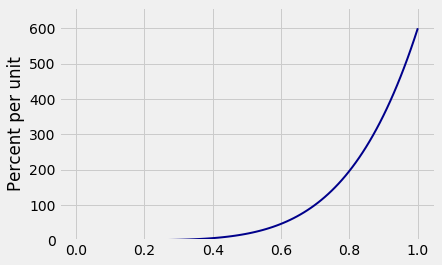

In [34]:
Plot_continuous([0, 1], f_X)

Before you go further, please review Part **1d** on Integration very carefully.

### 2b) Finding Probabilities ###

Find $P(X > 0.75)$ by integrating the density appropriately. The code in the first cell below should display the integral and in the next cell you will evaluate that integral.

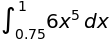

In [35]:
# Display the integral for P(X > 0.75)

Integral(f_X, (x,0.75,1))

In [36]:
# Evaluate P(X > 0.75)

Integral(f_X, (x,0.75,1)).doit()

In the cell below, fill in the blanks with numbers: The event $\vert X - 0.7 \vert < 0.25$ is the same as the event $X \in (\underline{~~~~~~~~~~~}, \underline{~~~~~~~~~~~})$.


**Your answer**

First blank: $X > 95 $

Second blank: $X < 0.45$

Find $P(\vert X - 0.7 \vert < 0.25)$.

In [37]:
# P(|X - 0.7| < 0.25)

(Integral(f_X, (x,0.95,1)) + Integral(f_X,(x,0,0.45))).doit()

### 2c) Finding Expectations ###

Read [Section 15.3](http://prob140.org/textbook/Chapter_15/03_Expectation.html) before you get started.

Find $E(X)$.

In [38]:
# E(X)

expectation_X = Integral(f_X*x,(x,0,1)).doit()
expectation_X

Find $SD(X)$.

In [39]:
# SD(X)

SD_X = Integral(f_X*(x-6/7)**2,(x,0,1)).doit()**(1/2)
SD_X

Just because you can, find $E(\log(X))$. `SymPy` recognizes `log`. Use the first cell below to display the appropriate integral and use the next cell to evaluate it.

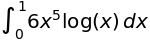

In [40]:
# Display the integral for E(log(X))

Integral(f_X*log(x), (x,0,1))

Notice that `SymPy` writes its integrand in a different order than we do in class. That's OK; it doesn't affect the integral.

In [41]:
# Numerical value of E(log(X))

Integral(f_X*log(x), (x,0,1)).doit()

Why is the answer negative?


**Your answer here**

The answer is negative since the log of any number between 0 and 1 will be negative since a number has to be to the negative power in order to be between 0 and 1.

Find $E(\sin^2(X))$, first displaying the integral and then evaluating it. Use `sin` for sine.

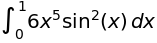

In [42]:
# Display the integral for E(sin_squared(X))

Integral(f_X*sin(x)**2, (x,0,1))

In [43]:
value_of_integral = Integral(f_X*sin(x)**2, (x,0,1)).doit()
value_of_integral

Sometimes `SymPy` can collect terms and simplify its answers. If you are good at half-angle formulae in trigonometry, you can check by hand that the simplification below is correct. But you don't need to do that for the lab.

In [44]:
simplify(value_of_integral)

### 2d) Change of Variable ###
Let $g$ be a monotone differentiable function and let $V = g(X)$. The change of variable formula for densities says that the density of $V$ is given by

$$
f_V(v) = \frac{f_X(x)}{\big{|} \frac{d}{dx} g(x) \big{|}} ~~~~~ \text{evaluated at } x = g^{-1}(v)
$$

See [Section 16.2](http://prob140.org/textbook/Chapter_16/02_Monotone_Functions.html) of the textbook for the derivation and examples. Each time you use the formula, the main steps to find the density are:

- Find the possible values of $V = g(X)$.
- Find the inverse of $g$.
- Find the derivative of $g$.
- Divide the density of $X$ by the derivative of $g$ (if the derivative is negative, use its absolute value instead).
- Evaluate this quotient at the inverse of $g$.

Use the formula to find the density of the area of a disc that has radius $X$. That is, find the density of $V = \pi X^2$.

Start by constructing a `SymPy` expression `g` defined by $g(x) = \pi x^2$. `SymPy` recognizes `pi` as $\pi$. Remember that you have already declared `x`.

In [45]:
g = pi*x**2 
g

It is worth keeping in mind that you have two representations of $\pi$: 

- `pi` produces the symbol $\pi$, using `SymPy`
- `np.pi` produces a numerical approximation to $\pi$, using `NumPy` 

In [46]:
pi, np.pi

As always, when you are specifying a distribution, start with the possible values. What are the possible values of the random area $V$? 


**Your answer here**
The possible values for random area V are 0 to pi since the range of x is from 0 to 1

Now find all the elements of the right hand side of the change of variable formula, one by one.

First find the function $g^{-1}$ by using the equation $g(x) = v$ to write $x$ in terms of $v$. That is, solve for $x$ in the equation $g(x) = v$, or, equivalently, in the equation $g(x)-v = 0$. 

Review Parts **1f** and **1g** carefully before you proceed.

In [47]:
v = Symbol('v', positive=True)
g_inverse = solve(g - v,x)
g_inverse

Notice that `SymPy` lists just one inverse – the positive one – because you specified that $x$ is positive. The other inverse is $-\frac{\sqrt{v}}{\sqrt{\pi}}$ but it is not a permitted value of $x$ because it is negative.

Run the cell below to extract the inverse from the list.

In [48]:
g_inverse = g_inverse[0]
g_inverse

The change of variable formula has another factor: the derivative in the denominator. Because $g$ is an increasing function, its derivative is positive and you won't need the absolute value in the formula.

Use `SymPy` to find the derivative of $g$, so that the expression `deriv_g` is equal to $\frac{d}{dx}g(x)$. 

**Do not** find the derviative by hand and simply assign that expression to `deriv_g`. See **1e** for how to differentiate in `SymPy`.

In [49]:
deriv_g = diff(g)
deriv_g

Now apply the change of variable formula to find $f_V$, the density of $V$. **In the comment line, enter the possible values of $V$.**

In [50]:
"""For v in the interval ..., the density of V at the point v is:"""

f_V = (f_X/ deriv_g).subs(x,g_inverse)
f_V

Check that the function `f_V` is a density.

In [126]:
Integral(f_V, (v,0,pi)).doit()

Plot the graph of the density of $V$. Recall from Part **a** that the first argument of `Plot_continuous` is a list of two elements: the left and right ends of the interval over which to plot the graph. They must be numerical expressions, not symbolic.

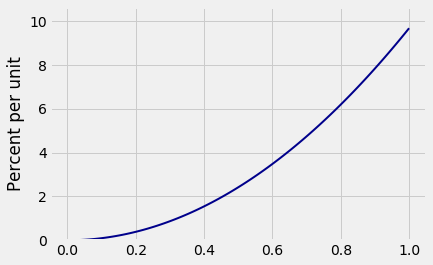

In [53]:
Plot_continuous([0,1], f_V)

#newpage


## Part 3: Transforming an $F$ Distribution ##
The density you worked with in Part 2 was deliberately chosen to be simple. The real value of `SymPy` is that without much difficulty you can use essentially the same code to handle more complicated density functions.

In this part of the lab you will start with one of the famous distributions of statistical inference, confusingly named the $F$ distribution. It's not named for our old friend the cdf. It is named for our other old friend Sir Ronald Fisher, the extraordinary scientist whose contributions include what is now the standard method of testing statistical hypotheses. You might recall from Data 8 that it was Fisher who found 5% to be a "convenient" cutoff for the P-value, which then became set in stone as the cutoff for statistical significance.

The $F$ distribution arises as the distribution of the ratio of two independent gamma random variables (apart from a constant multiplier). The ratio arises in tests of whether three or more random samples come from the same underlying distribution.

For the purposes of this lab, the $F$ distribution is just an ordinary distribution on the positive numbers. It has two parameters, which we will call $n$ for "numerator" and $d$ for "denominator". And its density has a rather intimidating formula.

### The $F_{n,d}$ Density ###
The gamma function of mathematics is denoted $\Gamma$ (that's the upper case Greek letter gamma) and is defined as an integral. Both its domain and range are the positive numbers. In your current Homework assignment you are examining the definition and properties of the gamma function. In this lab, you will only need one of those results:

For positive integer $n$, $\Gamma(n) = (n-1)!$.

Now for the definition of the $F$ density.

Let $n$ and $d$ be positive integers. The random variable $X$ has the $F_{n,d}$ distribution if the density of $X$ is

$$
f_X(x) ~ = ~ \frac{\Gamma\big{(}\frac{n}{2} + \frac{d}{2}\big{)}}{\Gamma\big{(}\frac{n}{2}\big{)}\Gamma\big{(}\frac{d}{2}\big{)}} \big{(} \frac{n}{d} \big{)}^{\frac{n}{2}} x^{\frac{n}{2} -1}\big{(}1 + \frac{n}{d}x \big{)}^{-\frac{n+d}{2}} ~, ~~~~~~~ x > 0
$$

That looks awful. But it isn't, really. Let's see why.

### 3a) The Constant ###
As with many densities, the part of the formula that looks most impressive is actually the least interesting as far as the shape of the density is concerned. It's just the constant of integration: the numerical factor that makes the density integrate to 1. 

To evaluate the constant you will need to evaluate the gamma function numerically. The `SymPy` function `gamma` can be used for this. The function also has another use but you will not need that for this lab.

In [58]:
gamma(4)

In [59]:
gamma(4.5)

In [88]:
gamma(5)

In [57]:
r = Symbol('r', positive=True)
gamma(r)

Start out by evaluating the constant in the $F_{n,d}$ density. Define a Python function `constant_F` that takes $n$ and $d$ as its arguments and returns the normalizing constant in the density above. 

In [70]:
def constant_F(n, d):
    return (n/d)**(n/2)*gamma(n/2+d/2)/(gamma(n/2)*gamma(d/2))

Work out (by hand or by mental math) the constant when $n = d = 4$, and check that your function returns the right value.

In [71]:
constant_F(4, 4)

As another check, work out the constant when $n = 2$ and $d = 4$, and check that your function returns the right value.

In [72]:
constant_F(2, 4)

### 3b) The $F_{6, 4}$ Density ###

As a numerical example, let $X$ have the $F_{6, 4}$ density, which we will call $f_X$. Construct a `SymPy` expression `f_X` that is equal to $f_X(x)$.

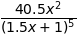

In [80]:
x = Symbol('x', positive=True)
f_X = constant_F(6,4)*x**(6//2 - 1)*(1+(6/4)*x)**(-(6+4)//2)
f_X

That's not very scary at all. It's just a ratio of two polynomials, because $n=6$ and $d=4$ are both even. 

Check that $f_X$ is a density. Here you get to use something cute: 

- As the symbol for infinity, `SymPy` uses two lower case letter o's side by side, because oo looks like $\infty$.

In [82]:
Integral(f_X, (x,0, oo)).doit()

Run the cell below to plot the density.

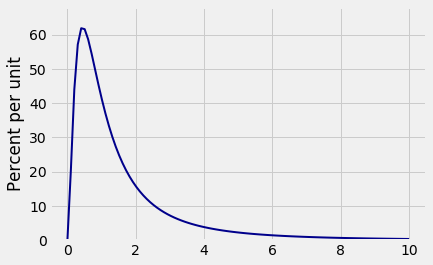

In [83]:
Plot_continuous([0, 10], f_X)

### 3c) A Transformation and its Inverse ###
In the rest of this part of the lab, you will find the density of a function of $X$. Review Part **2d** very carefully first.

Define a new random variable $V$ by applying the following function $g$ to the random variable $X$:

$$
g(x) ~ = ~ \frac{\frac{n}{d}x}{1 + \frac{n}{d}x}
$$
Then
$$
V ~ = ~ g(X) ~ = ~ \frac{\frac{n}{d}X}{1 + \frac{n}{d}X}
$$

With the help of `SymPy`, you are going to find the density of $V$.

As always, start with the possible values. What are the possible values of V?


**Your answer here**

V can take values from 0 to 1

For $n = 6$ and $d = 4$, construct an expression `g` that is equal to $g(x)$ as defined above.

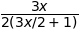

In [93]:
g = (6*x/4)/(1+(6*x/4))
g

Is the function $g$ increasing or decreasing? Explain your answer.


**Your answer here**

As X increases, the value of the function is also increasing, thus g(x) is a monotonic increasing.

To find the density of $V = g(X)$, you will need the inverse of $g$.

The function $g$ has a unique inverse. Let $v = g(x)$. Find the function $g^{-1}$ by completing the cell below. 

In [95]:
v = Symbol('v', positive=True)
g_inverse = solve(g-v,x)[0]
g_inverse

Remember that for each $v$, $g^{-1}(v)$ is a value of $x$. Since $x$ is positive, the inverse you just found better not be negative. Show by algebra (without using `SymPy`) that the inverse calculated above is positive for each possible value $v$ of $V$.


**Your answer here**
The inverse we calculated above is positive since we know that the possible values of V are between 0 and 1, thus the denominator, 3𝑣−3, will always be negative for all V and hence the negative sign on the front of the expression gets cancelled, hence creating a positive value.

### 3d) A Derivative ###

Complete the cell below so that `deriv_g` equals $\frac{d}{dx}g(x)$.

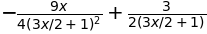

In [98]:
deriv_g = diff(g)
deriv_g

Explain why this derivative is positive for all positive $x$.


**Your answer here**

We can see that the negative expression is the square of the right side multiplied by x, thus once we simplify the expression above, we see that the expression is positive since the square of a fraction will always be less then the original fraction itself (square of any number less then 1 will be less then itself):

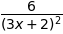

In [100]:
simplify(deriv_g)

### 3e) The Density of the Transformation ###
Use the change of variable formula in **2d** to find $f_V$, the density of $V$. Start by filling in the possible values of $V$ in the comment line.

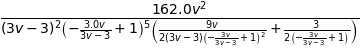

In [103]:
# Density of V:

"""For v in the interval ..., the density of V at the point v is:"""

f_V = (f_X/deriv_g).subs(x, g_inverse)
f_V

Yikes! That looks like a horrible mess. 

Does it simplify at all? Run the next cell and see.

In [109]:
f_V = simplify(f_V)
f_V

Algebra is truly wonderful. Especially when `SymPy` does it for you.

Recognize the density of $V$ as one of the famous ones and state its name and parameters. If you are stuck, you may find [Chapter 17.4](http://prob140.org/textbook/Chapter_17/04_Beta_Densities_with_Integer_Parameters.html) helpful.


**Your answer here**

This is the beta(3,2) density function

Plot the density of $V$ over all the possible values of $V$.

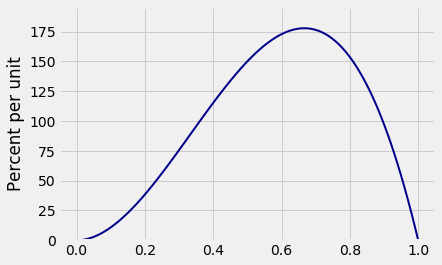

In [105]:
Plot_continuous([0,1], f_V)

**Note:** There is nothing special about the choices $n=6$ and $d=4$ as far as this result is concerned. If you had started out with a different $(n, d)$ pair, you would have ended up with a density in the same family but with different parameters. Based on your answer in the case $(6, 4)$, you might be able to guess what the parameters would be in general.

#newpage

## Part 4: Working with Joint Densities ##
A joint density is a function of two variables. This part of the lab shows you how to work with such functions in `SymPy`.

Before you get started, please read [Section 17.1](http://prob140.org/textbook/Chapter_17/01_Probabilities_and_Expectations.html) of the textbook. The rest of the lab will go faster that way.

Let $X$ and $Y$ have joint density given by
$$
f(x, y) ~ = ~ x+y, ~~~~ 0 < x, y < 1
$$

In order to find probabilities, densities, or expectations of functions of $X$ and $Y$, you have to create two symbols, which we will assign to the names `x` and `y`. Since both have values in $(0, 1)$, we will use the `positive=True` option.

In [112]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

In [113]:
f = x+y
f

You know that the integral of $f$ over the entire unit square has to be 1. To calculate this using `SymPy`, you have to specify a double integral. The general expression used to display a definite double integral is `Integral` with three arguments:

- the name of the function to integrate
- (inner_integral_variable, lower_limit, upper_limit)
- (outer_integral_variable, lower_limit, upper_limit)

Read each of the three cells below carefully before you run them. You will need the syntax later.

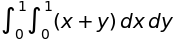

In [114]:
# Integral of f over the unit square,
# integrating x first and then y

Integral(f, (x, 0, 1), (y, 0, 1))

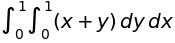

In [115]:
# Integral of f over the unit square,
# integrating y first and then x

Integral(f, (y, 0, 1), (x, 0, 1))

In [116]:
# Evaluating both integrals

Integral(f, (x, 0, 1), (y, 0, 1)).doit(), Integral(f, (y, 0, 1), (x, 0, 1)).doit()

### 4a) [ON PAPER] ###
On a sketch of the unit square, shade the region corresponding to the event $Y > 2X$. Then write $P(Y > 2X)$ as a double integral, in two ways:

- by integrating $y$ first and then $x$
- by integrating $x$ first and then $y$

The region isn't a rectangle, so pay attention to the limits of integration.

### 4b) ###
In the two cells below, display your answers to Part **a**. Do not evaluate the integrals.

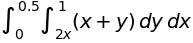

In [121]:
# P(Y > 2X) by integrating y first and then x

Integral(f, (y, 2*x,1), (x,0,0.5))

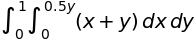

In [123]:
# P(Y > 2X) by integrating x first and then y

Integral(f, (x, 0, 0.5*y), (y,0,1))

Check that the numerical values of the two double integrals are the same. Notice that `SymPy` makes choices about how to represent numbers; you might need another cell to do some arithmetic.

In [124]:
# numerical value of P(Y > 2X)

Integral(f, (y, 2*x,1), (x,0,0.5)).doit(), Integral(f, (x, 0, 0.5*y), (y,0,1)).doit()

### 4c) Marginal ###

Find the marginal density of $X$. See [Section 17.3](http://prob140.org/textbook/Chapter_17/03_Marginal_and_Conditional_Densities.html).

In [166]:
# For x in the interval 0 to 1, the marginal density of X at the point x is:

f_X = Integral(f, (y,0,1)).doit()
f_X

Without calculation, say what the marginal density of $Y$ is. Explain your answer.


**Your answer here**

The marginal density of Y will be the same as the marginal density of X since the integral of the function (x+y) is the same for both x and y since both will have the range (0,1).

### 4d) Expectation ###
What is the relation between $E(X+Y)$ and $E(X)$?


**Your answer here**

E(X+Y) will be the same as 2E(X)

Use `f_X` (not `f`) to find the numerical value of $E(X+Y)$.

In [145]:
Integral(f_X*(2*x), (x,0,1)).doit()

Use the first cell below to display $E(XY)$ as an integral (see [Section 17.1](http://prob140.org/textbook/Chapter_17/01_Probabilities_and_Expectations.html)), and use the second cell to find its numerical value.

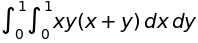

In [163]:
# E(XY) displayed as an integral

Integral(f*(x*y),(x,0,1),(y,0,1))

In [164]:
# Numerical value of E(XY)

Integral(f*(x*y),(x,0,1),(y,0,1)).doit()

### 4e) Conditioning ###
For $x \in (0, 1)$, find the conditional density of $Y$ given $X=x$. This should be an expression involving both `x` and `y`, assigned to the name `f_Y_given_X_is_x`. Fill in the possible values in the comment. 

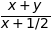

In [170]:
"""Given X=x, the possible values of Y are ... For y in this range:"""

f_Y_given_X_is_x = f/f_X
f_Y_given_X_is_x

For each $x$, this should be a density. Is it? First, display the integral that you have to calculate to check this.

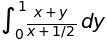

In [174]:
Integral(f_Y_given_X_is_x, (y,0,1))

Now evaluate the integral and check that it has the right value. Use `simplify` if necessary.

In [176]:

simplify(Integral(f_Y_given_X_is_x, (y,0,1)).doit())

Use `f_Y_given_X_is_x` to find the conditional density of $Y$ given $X = 0.25$ and assign it to the name `f_Y_given_X_is_025`.

In [177]:
f_Y_given_X_is_025 = f_Y_given_X_is_x.subs(x, 0.25)
f_Y_given_X_is_025

The cell below assigns $P(Y^2 > 0.9 \mid X = 0.25)$ to the name `prob` and $E(Y \mid X = 0.25)$ to `cond_exp`. Find the two numerical values by completing the cell.

In [182]:
prob = Integral(f_Y_given_X_is_025, (y,np.sqrt(0.9), 1)).doit()
cond_exp = Integral(f_Y_given_X_is_025*y, (y,0, 1)).doit()

prob, cond_exp

## Conclusion ##
Congratulations! The work that you have done in this lab will help reinforce your understanding of some of the most fundamental concepts of probability theory.

What you have learned:

- How to do symbolic math in Python
- How to work with densities and joint densities
- How to find the density of a transformed random variable 
- How to use conditioning when random variables are continuous

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general Lab 8 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Lab 8 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 